# COGS 118A - Project Checkpoint

# Names

Hopefully your team is at least this good.

- Omri Habot
- Keate Ehrenburg
- Jacob Lamadrid
- Alex Bumbalov

# Abstract

The goal of this project is to examine the effectiveness of different models in predicting the outcome of a chess match. The data used in this project will contain features describing players’ technical skill and experience including the Elo rating of each player, the number of games they have played, the number of wins/losses/draws they have achieved, their age, and the length of the game. These are measured by observing the outcomes of every game in a player’s career. We will use this data to perform feature selection and single out the most relevant features, and then we will train the models and compare their predictive accuracies. Accuracy will be measured by classification error metrics including precision, recall, f1-score, and possibly others, which we will compare across models to observe their relative efficacies.

# Background

Within the world of chess competitions and general play, machine learning and deep learning have been famously applied in such algorithms as Deep Blue, Stockfish, etc. These algorithms historically have aimed to predict the next best move to be executed as well as the win probability at any given position state [1](https://arxiv.org/pdf/2109.11602.pdf). This win probability is what we aim to place our project emphasis upon as in similar works in varying competitive settings, most relevant of which is found in esports win/loss classification based upon player/team rankings and typical movesets among many other features [2](https://arxiv.org/pdf/2108.02799.pdf). The application of these algorithms in returning win probability and outcome prediction has large impacts in the way one chooses to learn chess or the way in which a machine is taught how to play chess. This may also have implications for the way in which new strategies or entire play styles are formed. These implications have already manifested themselves in the competitive playspace as many players look towards Stockfish evaluations for input on their play or for other engines in which competition may aid in their training as “with the help of chess engines, Grandmasters are now able to plan prepare for their games in extreme depth, sometimes memorizing up to 15-20 moves of their openings” [3](https://fluency.mcsaatchi.com/2022/09/01/the-evolution-of-chess-ai/#:~:text=Artificial%20intelligence%20has%20completely%20changed,20%20moves%20of%20their%20openings.). In order to approach the problem of finding an appropriate machine learning prediction method , we are going to need a large amount of chess match data to work with. We have chosen to use the Free Internet Chess Server(FICS) database. The database has been collecting all rated and unrated games played on FICS since October of 2008. With over 200 million games stored, this will provide us with plenty of data to address our goal of outcome classification.

Our models will train similarly to that of current chess engines, utilizing previous games played in order to gain improve decision making and outcome prediction, as in the models created by the chess.com website, with machine learning algorithms such as Luk.AI with improves its elo with every game played.

# Problem Statement

The problem we will be aiming to address is determining which machine learning method best predicts the winner of a chess game depending on variables like participating players, player statistics and scores such as their Elo’s, the opening, and psychological factors of the players, among others. We plan to explore this problem by trying three different machine learning algorithms: logistic regression, random forest, and deep neural network. Logistic regression is a solid classification method. While we fear that it may be too simple for this task, we believe it is a simple baseline to compare with other, more complex models. We plan to try random forests because the complex decision boundaries may be sufficient for consistently accurate and generalizable predictions. Finally, we plan on using a deep neural network because it seems to be the baseline method used for very similar problems, and given our large dataset, we hope it will pick up on important nuances that are neglected by logistic regression and random forest. We will use labeled chess game data that denotes the winner of each game as well as the aforementioned variables that describe the game. Each model will be trained using the same (or similar) dataset and evaluated with the same set of classification error metrics such that we can compare their efficacies. These metrics include precision, recall, f1-score, and others.

# Data

We will be using the [Free Internet Chess Server (FICS)](https://www.ficsgames.org/dl/ficsgamesdb_202301_blitz2000_movetimes_278527.pgn.bz2) as our database for analysis. The dataset comes in the Portable Game Notation (PGN) file format, which is a common data format for representing chess games. We will need to convert this into a pandas dataframe for our analysis, so we will write a function that parses through the PGN file as text and builds a dataframe from it. Once the data is parsed, we will simply need to convert each column into the appropriate datatype, so numbers would be int32 or float64, words will be strings, binary features will be boolean, etc.

There are many different types of chess games from which we can choose that would cause nuances in our analysis and results. We selected blitz games because their rapid nature produces more variability in game moves, and therefore outcomes. We hope that this variability gives us more data to work with when predicting outcomes. Our dataset has 2461 observations (each representing a chess game) as well as 20 features describing each game. Each observation consists of the moves made throughout the game, the date and time played, the players and their colors, player Elo, match result, and game variant and time control information for each match. One of the most critical features is `playerElo`, a score representing the relative skill levels of players, since this is likely one of the biggest predictors of the outcome. This is represented by an arbitrary number that can indicate a player's relative skill level when compared to other players. Another crucial feature is `moves`, which outlines all the moves made in the game. We can use this sequential data to build more complex models and make more nuanced predictions.

### Data Importing/Cleaning

In [1]:
import pandas as pd
import re

def parse_game(game):
    sections = re.split('\n\s*\n', game.strip())
    game_dict = dict([line.replace("]", '').replace("[", '').split(' ', 1) for line in sections[0].split('\n')])
    game_dict['Moves'] = sections[1]
    return game_dict

with open('ficsgamesdb_202301_blitz2000_movetimes_278527.pgn') as f:
    #next(f)
    games = (parse_game(game) for game in f.read().split('\n\n['))

In [2]:
df = pd.DataFrame(games)
df.head()

Event                  Site FICSGamesDBGameNo  \
0  "FICS rated blitz game"  "FICS freechess.org"       "530203389"   
1  "FICS rated blitz game"  "FICS freechess.org"       "530203352"   
2  "FICS rated blitz game"  "FICS freechess.org"       "530203324"   
3  "FICS rated blitz game"  "FICS freechess.org"       "530203266"   
4  "FICS rated blitz game"  "FICS freechess.org"       "530203175"   

            White           Black WhiteElo BlackElo WhiteRD BlackRD  \
0     "konozrout"       "Geforce"   "2060"   "1957"  "27.4"  "15.9"   
1       "Geforce"     "pikozrout"   "1951"   "2137"  "15.9"  "39.5"   
2       "Geforce"     "konozrout"   "1957"   "2054"  "15.9"  "27.5"   
3  "GimmeDatKing"        "Frubes"   "2292"   "1796"  "74.1"  "49.4"   
4     "playoften"  "GimmeDatKing"   "1826"   "2290"  "24.8"  "74.5"   

  WhiteIsComp TimeControl          Date        Time     WhiteClock  \
0       "Yes"     "300+0"  "2023.01.31"  "23:27:00"  "0:05:00.000"   
1         NaN     "300+0"  "2023.01.31"  "23:17:00"  "0:05:00.000"   
2         NaN     "300+0"  "2023.01.31"  "23:03:00"  "0:05:00.000"   
3         NaN     "300+0"  "2023.01.31"  "22:43:00"  "0:05:00.000"   
4         NaN     "300+0"  "2023.01.31"  "22:22:00"  "0:05:00.000"   

      BlackClock    ECO PlyCount     Result  \
0  "0:05:00.000"  "B00"     "55"  "1/2-1/2"   
1  "0:05:00.000"  "B40"     "69"  "1/2-1/2"   
2  "0:05:00.000"  "B52"    "134"      "0-1"   
3  "0:05:00.000"  "B90"     "55"      "1-0"   
4  "0:05:00.000"  "A04"     "42"      "0-1"   

                                               Moves BlackIsComp  
0  1. e4 {[%emt 0.0]} e5 {[%emt 0.0]} 2. d4 {[%em...         NaN  
1  1. e4 {[%emt 0.0]} c5 {[%emt 0.0]} 2. Nf3 {[%e...       "Yes"  
2  1. e4 {[%emt 0.0]} c5 {[%emt 0.0]} 2. Nf3 {[%e...       "Yes"  
3  1. e4 {[%emt 0.0]} c5 {[%emt 0.0]} 2. Nf3 {[%e...         NaN  
4  1. Nf3 {[%emt 0.0]} f5 {[%emt 0.0]} 2. d4 {[%e...         NaN

In [5]:
# Cleaning

def clean_df(df): # Depricated
    datetime_columns = ['Date', 'Time', 'WhiteClock', 'BlackClock']
    float_columns = ['WhiteRD', 'BlackRD']
    int_columns = ['FICSGamesDBGameNo', 'WhiteElo', 'BlackElo', 'PlyCount']
    
    for column in df.columns:
        
        if df[column].dtype != object or not isinstance(df.iloc[0][column], str): # Keeps from cleaning the data twice
            continue
        if column in float_columns:
            df[column] = df[column].apply(lambda f: float(f.replace('"', '')))
        elif column in int_columns:
            df[column] = df[column].apply(lambda n: int(n.replace('"', '')))
        elif column in datetime_columns:
            df[column] = df[column].apply(lambda d: pd.to_datetime(d.replace('"', '')))
        else:
            df[column] = df[column].apply(lambda s: str(s).replace('"', '')).astype('category')
    
    df['WhiteIsComp'] = df['WhiteIsComp'] == 'Yes'
    df['BlackIsComp'] = df['BlackIsComp'] == 'Yes'
    
    return df

In [6]:
cleaned = clean_df(df)
print(cleaned.shape)
print(cleaned.dtypes)
cleaned.head()

(2461, 20)
Event                      category
Site                       category
FICSGamesDBGameNo             int64
White                      category
Black                      category
WhiteElo                      int64
BlackElo                      int64
WhiteRD                     float64
BlackRD                     float64
WhiteIsComp                    bool
TimeControl                category
Date                 datetime64[ns]
Time                 datetime64[ns]
WhiteClock           datetime64[ns]
BlackClock           datetime64[ns]
ECO                        category
PlyCount                      int64
Result                     category
Moves                      category
BlackIsComp                    bool
dtype: object


Event                  Site  FICSGamesDBGameNo  \
0  "FICS rated blitz game"  "FICS freechess.org"          530203389   
1  "FICS rated blitz game"  "FICS freechess.org"          530203352   
2  "FICS rated blitz game"  "FICS freechess.org"          530203324   
3  "FICS rated blitz game"  "FICS freechess.org"          530203266   
4  "FICS rated blitz game"  "FICS freechess.org"          530203175   

          White         Black  WhiteElo  BlackElo  WhiteRD  BlackRD  \
0     konozrout       Geforce      2060      1957     27.4     15.9   
1       Geforce     pikozrout      1951      2137     15.9     39.5   
2       Geforce     konozrout      1957      2054     15.9     27.5   
3  GimmeDatKing        Frubes      2292      1796     74.1     49.4   
4     playoften  GimmeDatKing      1826      2290     24.8     74.5   

   WhiteIsComp TimeControl       Date                Time          WhiteClock  \
0         True       300+0 2023-01-31 2023-03-09 23:27:00 2023-03-09 00:05:00   
1        False       300+0 2023-01-31 2023-03-09 23:17:00 2023-03-09 00:05:00   
2        False       300+0 2023-01-31 2023-03-09 23:03:00 2023-03-09 00:05:00   
3        False       300+0 2023-01-31 2023-03-09 22:43:00 2023-03-09 00:05:00   
4        False       300+0 2023-01-31 2023-03-09 22:22:00 2023-03-09 00:05:00   

           BlackClock  ECO  PlyCount   Result  \
0 2023-03-09 00:05:00  B00        55  1/2-1/2   
1 2023-03-09 00:05:00  B40        69  1/2-1/2   
2 2023-03-09 00:05:00  B52       134      0-1   
3 2023-03-09 00:05:00  B90        55      1-0   
4 2023-03-09 00:05:00  A04        42      0-1   

                                               Moves  BlackIsComp  
0  1. e4 {[%emt 0.0]} e5 {[%emt 0.0]} 2. d4 {[%em...        False  
1  1. e4 {[%emt 0.0]} c5 {[%emt 0.0]} 2. Nf3 {[%e...        False  
2  1. e4 {[%emt 0.0]} c5 {[%emt 0.0]} 2. Nf3 {[%e...        False  
3  1. e4 {[%emt 0.0]} c5 {[%emt 0.0]} 2. Nf3 {[%e...        False  
4  1. Nf3 {[%emt 0.0]} f5 {[%emt 0.0]} 2. d4 {[%e...        False

# Proposed Solution

In this project we aim to evaluate the effectiveness of three different machine learning implementations at classifying the outcomes of FIDE titled chess games from unlabeled match data. Each model (Logisitc Regression, Random Forests, and the Deep NN) will be trained on a curated sample database consisting of several derived features representing characteristics of the games pertinent to the games’ outcomes. For this we will need to use a variety of tools for accessing and manipulating the data to generate these special features. Pandas and numpy will be instrumental in this preprocessing stage. Further imports will be required for sklearn and matplot lib for training/validation and analysis, as well as an additional library called pychess will be necessary for processing chess engine ratings and to help format game data for preprocessing. We will be using built in methods for training and validating data provided to us by sklearn. To measure the effectiveness of our model we will take Sayon Bhattacharjee’s LSTM solution published in the _Towards Data Science_ article found [here](https://towardsdatascience.com/predicting-professional-players-chess-moves-with-deep-learning-9de6e305109e). Sayon's LTSM solution uses two convolutional neural networks; one "predicts" where a particular piece moved from, and the other predicts where a piece will move. These networks are combined as a time series to model a classification problem with three possible output categories corresponding with the outcome: black wins, white wins, or there is a draw. The effectiveness of this model can simply be measured by classification accuracy using metrics discussed in the following section.

# Evaluation Metrics

In the evaluation of binary chess outcome classification, simply implementing a confusion matrix of our algorithm’s results is most appropriate for visualizing the performance. In this situation, there is equal cost associated with both false positive rates and false negative rates, and there is equal cost associated with true positives and true negative rates. Consequently, we care about both the recall and precision of our models equally. This suggests that an f1-score is one primary metric we should use, since it is equally sensitive to both recall and precision. For example, predicting that Player 1 wins when they actually win is equally as important as being ‘accurate’ when predicting that Player 1 will win; the cost of a false positive is no different than the cost of a false negative. We may also explore some other classification error metrics such as likelihood ratios.

$$precision = \frac{TP}{TP + FP}$$
$$recall = \frac{TP}{TP + FN}$$
$$F1-Score = \frac{2*precision*recall}{precision + recall}$$

# Preliminary results

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters

### Black vs. White Data Analysis

In [42]:
outcomes = cleaned[['WhiteElo', 'BlackElo', 'Result']]
outcomes['Result'] = ['White' if i == '1-0' else 'Black' if i == '0-1' else 'Draw' for i in outcomes['Result']]
outcomes['EloDiff'] = outcomes['WhiteElo'] - outcomes['BlackElo']

/var/folders/9v/c3sfxh891tv9lvhdh2f3sdlw0000gn/T/ipykernel_12592/1582886678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outcomes['Result'] = ['White' if i == '1-0' else 'Black' if i == '0-1' else 'Draw' for i in outcomes['Result']]
/var/folders/9v/c3sfxh891tv9lvhdh2f3sdlw0000gn/T/ipykernel_12592/1582886678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outcomes['EloDiff'] = outcomes['WhiteElo'] - outcomes['BlackElo']


In [43]:
outcomes

WhiteElo  BlackElo Result  EloDiff
0         2060      1957   Draw      103
1         1951      2137   Draw     -186
2         1957      2054  Black      -97
3         2292      1796  White      496
4         1826      2290  Black     -464
...        ...       ...    ...      ...
2456      2160      1954  White      206
2457      2735      2781  Black      -46
2458      2782      2734   Draw       48
2459      1961      2156  Black     -195
2460      2733      2783   Draw      -50

[2461 rows x 4 columns]

<AxesSubplot: ylabel='Result'>

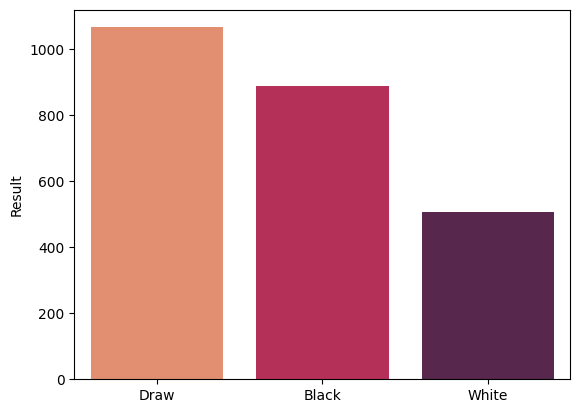

In [44]:
import seaborn as sns
import numpy as np
sns.barplot(x = outcomes['Result'].unique(), y=outcomes['Result'].value_counts(), palette='rocket_r')

It appears that there is an unbalanced representation of each match outcome. While there is a similar amount of draws and black wins, there seem to be very few white-win outcomes. This warrants further analysis--if winning actually depends on the color, then this is alright. However, if this is not the case, then we may need to upsample the white-win observations to make our dataset more balanced.

<AxesSubplot: xlabel='Result', ylabel='EloDiff'>

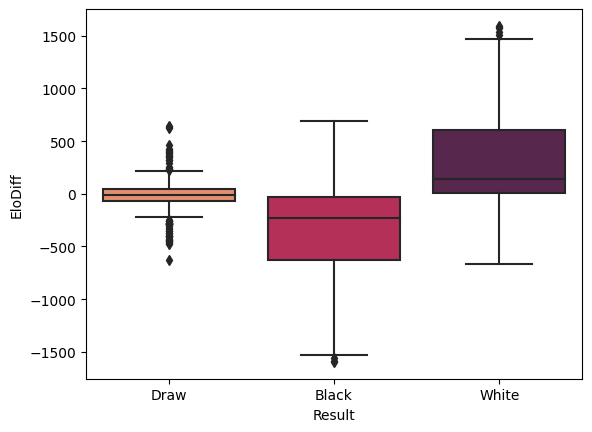

In [45]:
sns.boxplot(data=outcomes, x='Result', y='EloDiff', palette='rocket_r')

This graph shows that, generally, the player with the higher Elo rating tends to win, and draws often happen between two players with very similar Elo ratings. This confirms our assumption that Elo would be a strong predictor of outcome.

## Brief Model Demo

#### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [48]:
logreg = LogisticRegression()
X = df[['BlackElo', 'WhiteElo', 'BlackIsComp', 'WhiteIsComp']]
y = df['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [49]:
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.6948051948051948

Reasonably able to predict with a ~69.5% accuracy with a baseline logistic regression model only using player Elo and Comp status. We will try to expand on this beyond simply Elo and Comp status, possibly taking in opening moves etc.

# Ethics & Privacy
In the case of data privacy, we see no major concerns with our data as it is publicly available FIDE match information that is made public anytime a chess player agrees to a FIDE match. The biggest ethical concern that we could potentially see with the production of any well-functioning model for predicting FIDE titled chess matches would be the use of the model for gambling purposes. Although we don't foresee the prediction accuracy of our models being able to give a definitive answer to who will win a match, a good model could lead to an increase in chess match gambling which comes with its own host of harmful consequences. Additionally, we can highlight the concern that a prediction model could affect the way that players go about their matches if they know the predicted outcome of a game given specific features. This could be seen as an unfair advantage. The model, if then re-trained with new data, could also perform much more poorly as outcomes would now be affected by prior knowledge of the potential outcome of a game which would complicate further predictions.

# Team Expectations 
- Schedule consistent meetings and keep in reliable communication regarding deadlines so nobody falls behind
- Let the team know if any unexpected circumstances come up that would affect deadline completion for assigned work
- Don’t be afraid to be stuck and ask for help. This will help us all better understand the problem and perhaps lead us toward a better solution.
- Don’t be afraid to share any and all ideas that you think might be useful

# Project Timeline Proposal
| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 2/21  |  2 PM |  Collaborate on Project Proposal  | Determine strengths of each group member; find plausible datasets; research the background of our problem; determine the models to choose from; quickly establish ethics | 
| 2/22  |  2 PM | Edit, finalize, and submit proposal; Determine the right dataset(s) to use | Discuss ideal dataset(s) and models; Finalize and submit project proposal | 
| 3/3  | 2 PM  | Group check-in; Task delegation | Discuss retreiving and cleaning the dataset; Discuss wrangling and analytical approaches; Determine which features we’re creating and how we’ll create them; Delegate models to each team member |
| 3/7  | 2 PM  | Prepare for checkpoint | Fix issues with the proposal; Fill in new sections of the checkpoint; Delegate tasks |
| 3/8  | 2 PM  | Edit, finalize, and submit checkpoint | Ensure all aspects of the checkpoint are properly addressed; Iron out any kinks in our combined jupyter notebook |
| 3/15  | 2 PM  | Group check-in; discuss each individuals’ progress | Review/Edit wrangling/EDA; Discuss Analysis Plan; Discuss any adjustments we need to make |
| 3/18  | 2 PM  | Complete analysis; Draft results/conclusion/discussion | Discuss/edit full project together; hopefully we will be approximately done at this point  |
| 3/22  | Before 11:59 PM  | FINAL SUBMISSION | Turn in Final Project  |